In [60]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler ,StandardScaler
from sklearn.model_selection import train_test_split 
from keras.models import Sequential 
from keras.layers import *
from keras.callbacks import EarlyStopping
import seaborn as sns

## **Read Dataset**

In [2]:
df=pd.read_csv('fake_reg.csv')
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [4]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


## **Data Preprocessing**

In [7]:
x=df.iloc[:,1:]

In [8]:
y=df.iloc[:,0]

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [43]:
scaler=MinMaxScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

## **Model Building**

In [44]:
model=Sequential()

model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1))

In [45]:
es=EarlyStopping(patience=20,monitor='loss')

In [46]:
model.compile(optimizer='adam',loss='mse')
model.fit(x_train_scaled,y_train,epochs=300,callbacks=[es])

Epoch 1/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 785us/step - loss: 258042.1094 
Epoch 2/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - loss: 254880.6406
Epoch 3/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - loss: 255408.1094
Epoch 4/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - loss: 256085.1094
Epoch 5/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - loss: 256112.2812
Epoch 6/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - loss: 252047.3125
Epoch 7/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step - loss: 254352.6875
Epoch 8/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - loss: 258445.1875
Epoch 9/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - loss: 253517.5938
Epoch 10/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - loss: 252025.1719
Epoch 11/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step - loss: 249342.9062
Epoch 12/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - loss: 243006.2031
Epoch 13/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - loss: 240318.0781
Epoch 14/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 861

## **Test Model**

In [47]:
model.history.history

{'loss': [256428.046875,
  256329.296875,
  256225.5,
  256066.21875,
  255825.234375,
  255449.40625,
  254869.96875,
  254004.421875,
  252743.0625,
  250941.765625,
  248421.84375,
  244973.796875,
  240427.671875,
  234511.296875,
  226927.453125,
  217492.6875,
  206074.515625,
  192800.296875,
  177589.53125,
  160798.40625,
  142611.609375,
  123624.5546875,
  104366.5078125,
  85401.7578125,
  67512.8671875,
  51385.140625,
  37515.140625,
  26289.052734375,
  17676.49609375,
  11539.0703125,
  7493.533203125,
  5003.5966796875,
  3562.153564453125,
  2806.39111328125,
  2423.347900390625,
  2241.936279296875,
  2154.49755859375,
  2114.40625,
  2090.375244140625,
  2076.357177734375,
  2066.068359375,
  2055.730712890625,
  2045.3626708984375,
  2036.2349853515625,
  2025.2486572265625,
  2015.66796875,
  2005.5333251953125,
  1995.263671875,
  1984.8175048828125,
  1974.7325439453125,
  1965.36328125,
  1953.605712890625,
  1942.92236328125,
  1931.95361328125,
  1922.0903320

In [48]:
loss_df=pd.DataFrame(model.history.history)
loss_df

,loss
0,256428.046875
1,256329.296875
2,256225.500000
3,256066.218750
4,255825.234375
...,...
295,24.485809
296,23.965263
297,23.876169
298,23.869589


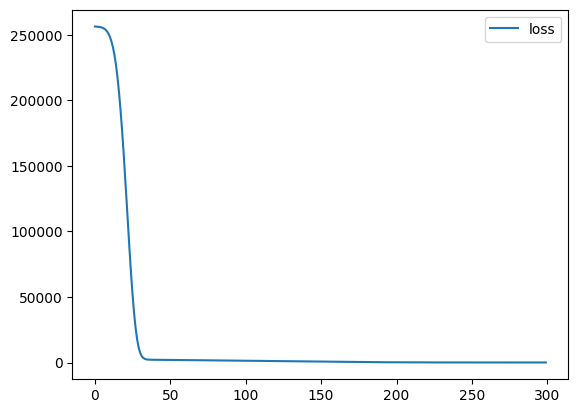

In [49]:
loss_df.plot()
plt.show()

In [50]:
model.evaluate(x_test_scaled,y_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - loss: 27.3660


25.48589324951172

In [51]:
model.evaluate(x_train_scaled,y_train)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - loss: 23.4871


23.709003448486328

In [52]:
y_pred=model.predict(x_test_scaled)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [53]:
y_test.shape

(250,)

In [55]:
y_true=pd.DataFrame(y_test.values,columns=['True Value'])
y_true

,True Value
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
245,515.778446
246,462.881631
247,507.434391
248,467.460596


In [57]:
y_predicate=pd.DataFrame(y_pred,columns=['Predicate_values'])
y_predicate

,Predicate_values
0,405.585968
1,623.529724
2,592.158020
3,572.306458
4,367.001831
...,...
245,518.989197
246,457.663422
247,505.969208
248,461.321503


In [58]:
dff=pd.concat([y_true,y_predicate],axis=1)
dff

,True Value,Predicate_values
0,402.296319,405.585968
1,624.156198,623.529724
2,582.455066,592.158020
3,578.588606,572.306458
4,371.224104,367.001831
...,...,...
245,515.778446,518.989197
246,462.881631,457.663422
247,507.434391,505.969208
248,467.460596,461.321503


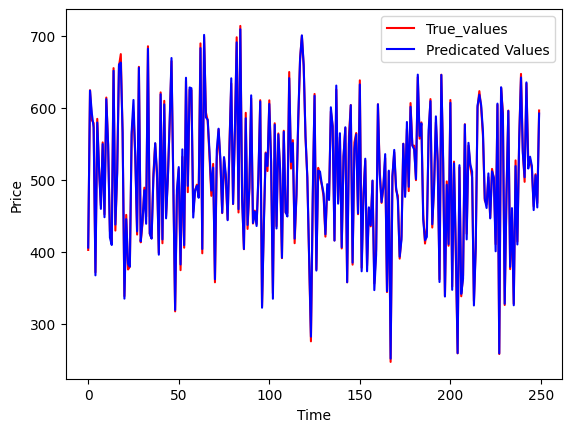

In [59]:
plt.plot(dff['True Value'],color='red',label='True_values')
plt.plot(dff['Predicate_values'],color='blue',label='Predicated Values')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

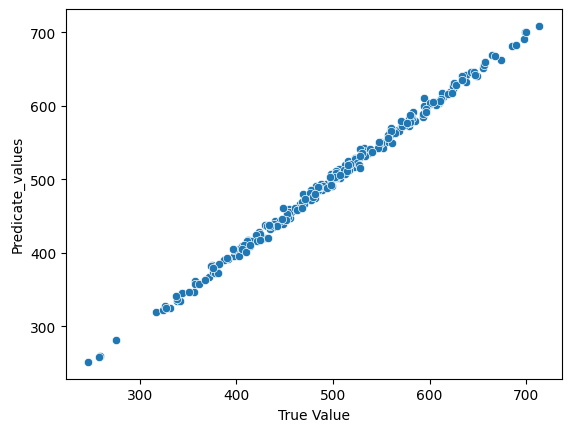

In [62]:
sns.scatterplot(x=dff['True Value'],y=dff['Predicate_values'])
plt.show()